In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.1 MB/s eta 0:00:0000:0100:01m


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools
     

# Constants
IMG_SIZE = 48
DATA_DIR = '/kaggle/input/facial-emotion-recognition/images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the dataset
csv_path = '/kaggle/input/facial-emotion-recognition/emotions.csv'
emotions_df = pd.read_csv(csv_path)
     

emotions_df['set_id'].unique()
     

# Encode the gender column
label_encoder = LabelEncoder()
emotions_df['gender'] = label_encoder.fit_transform(emotions_df['gender'])
     

emotions_df
# Function to load and preprocess images
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()
     

# Define the number of samples for training and testing
n_train = 5000
n_test = 3000

# Load the data
images, labels = load_data()

# Normalize pixel values to be within 0 and 1
images = images / 255.0

# Reduce dataset size
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[-n_test:]
test_labels = labels[-n_test:]

# Add an extra dimension for convolutional input (e.g., grayscale channels)
train_images = np.expand_dims(train_images, axis=-1)  # Shape: (n_train, 48, 48, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Shape: (n_test, 48, 48, 1)

# Convert labels to categorical
train_labels_categorical = to_categorical(train_labels, num_classes=len(EMOTIONS))
test_labels_categorical = to_categorical(test_labels, num_classes=len(EMOTIONS))

# Check the shapes of the processed data
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels_categorical.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
     

n_epochs = 30   # Number of optimization epochs
n_layers = 5    # Number of random layers


SAVE_PATH = ""  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

Train images shape: (64, 48, 48, 1)
Test images shape: (64, 48, 48, 1)
Train labels shape: (64, 8)
Test labels shape: (64, 8)



Running for 4 qubits...

Quantum circuit diagram:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-28 12:59:11.379314: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/30
2/2 - 2s - 898ms/step - accuracy: 0.2188 - loss: 2.1630 - val_accuracy: 0.6094 - val_loss: 1.3888
Epoch 2/30
2/2 - 0s - 45ms/step - accuracy: 0.6406 - loss: 1.3037 - val_accuracy: 0.9531 - val_loss: 0.9139
Epoch 3/30
2/2 - 0s - 46ms/step - accuracy: 0.7656 - loss: 0.9863 - val_accuracy: 0.9844 - val_loss: 0.5688
Epoch 4/30
2/2 - 0s - 46ms/step - accuracy: 0.9062 - loss: 0.6115 - val_accuracy: 0.9844 - val_loss: 0.3251
Epoch 5/30
2/2 - 0s - 47ms/step - accuracy: 0.9375 - loss: 0.4085 - val_accuracy: 0.9844 - val_loss: 0.2074
Epoch 6/30
2/2 - 0s - 46ms/step - accuracy: 0.8906 - loss: 0.3658 - val_accuracy: 0.9844 - val_loss: 0.1362
Epoch 7/30
2/2 - 0s - 44ms/step - accuracy: 0.9531 - loss: 0.2930 - val_accuracy: 0.9844 - val_loss: 0.0914
Epoch 8/30
2/2 - 0s - 43ms/step - accuracy: 0.9844 - loss: 0.1888 - val_accuracy: 1.0000 - val_loss: 0.0712
Epoch 9/30
2/2 - 0s - 44ms/step - accuracy: 0.9844 - loss: 0.1329 - val_accuracy: 1.0000 - val_loss: 0.0596
Epoch 10/30
2/2 - 0s - 45ms

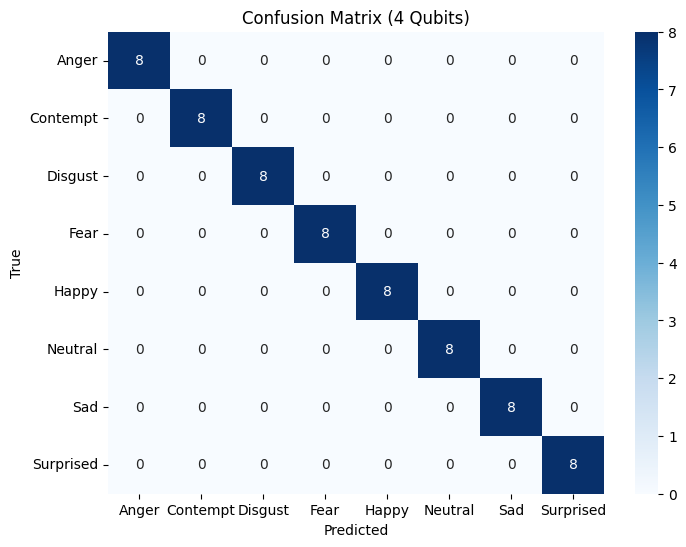

Test Accuracy: 1.0000


Running for 6 qubits...

Quantum circuit diagram:
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 769ms/step - accuracy: 0.2031 - loss: 2.0856 - val_accuracy: 0.8281 - val_loss: 1.5040
Epoch 2/30
2/2 - 0s - 46ms/step - accuracy: 0.6250 - loss: 1.4996 - val_accuracy: 0.8594 - val_loss: 1.0343
Epoch 3/30
2/2 - 0s - 47ms/step - accuracy: 0.8594 - loss: 0.9823 - val_accuracy: 0.9688 - val_loss: 0.6339
Epoch 4/30
2/2 - 0s - 46ms/step - accuracy: 0.9219 - loss: 0.6270 - val_accuracy: 0.9844 - val_loss: 0.3806
Epoch 5/30
2/2 - 0s - 46ms/step - accuracy: 0.9844 - loss: 0.4268 - val_accuracy: 0.9844 - val_loss: 0.2232
Epoch 6/30
2/2 - 0s - 48ms/step - accuracy: 0.9844 - loss: 0.2629 - val_accuracy: 0.9844 - val_loss: 0.1362
Epoch 7/30
2/2 - 0s - 46ms/step - accuracy: 0.9688 - loss: 0.2067 - val_accuracy: 0.9844 - val_loss: 0.0881
Epoch 8/30
2/2 - 0s - 47ms/step - accuracy: 0.9688 - loss: 0.1816 - val_accuracy: 0.9844 - val_loss: 0.0621
Epoch 9/30
2/2 - 0s - 46ms/step - accuracy: 0.9844 - loss: 0.1211 - val_accuracy: 1.0000 - val_loss: 0.0456
Epoch 10/30
2/2 - 0s - 45ms/step - acc

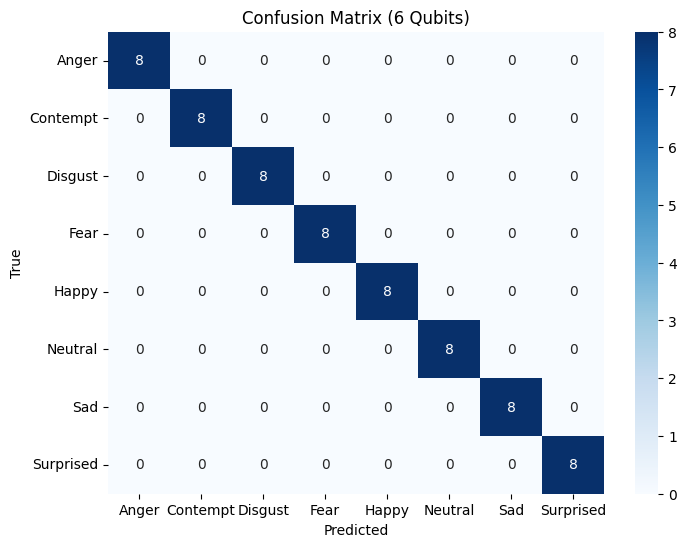

Test Accuracy: 1.0000


Running for 8 qubits...

Quantum circuit diagram:
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 754ms/step - accuracy: 0.2344 - loss: 2.1323 - val_accuracy: 0.8906 - val_loss: 0.8290
Epoch 2/30
2/2 - 0s - 48ms/step - accuracy: 0.7656 - loss: 0.7834 - val_accuracy: 0.9844 - val_loss: 0.2775
Epoch 3/30
2/2 - 0s - 48ms/step - accuracy: 0.9531 - loss: 0.3607 - val_accuracy: 0.9844 - val_loss: 0.1033
Epoch 4/30
2/2 - 0s - 48ms/step - accuracy: 0.9688 - loss: 0.1114 - val_accuracy: 0.9844 - val_loss: 0.0493
Epoch 5/30
2/2 - 0s - 50ms/step - accuracy: 0.9688 - loss: 0.1455 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 6/30
2/2 - 0s - 48ms/step - accuracy: 0.9844 - loss: 0.0669 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 7/30
2/2 - 0s - 48ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 8/30
2/2 - 0s - 47ms/step - accuracy: 0.9844 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 9/30
2/2 - 0s - 47ms/step - accuracy: 0.9844 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 10/30
2/2 - 0s - 47ms/step - acc

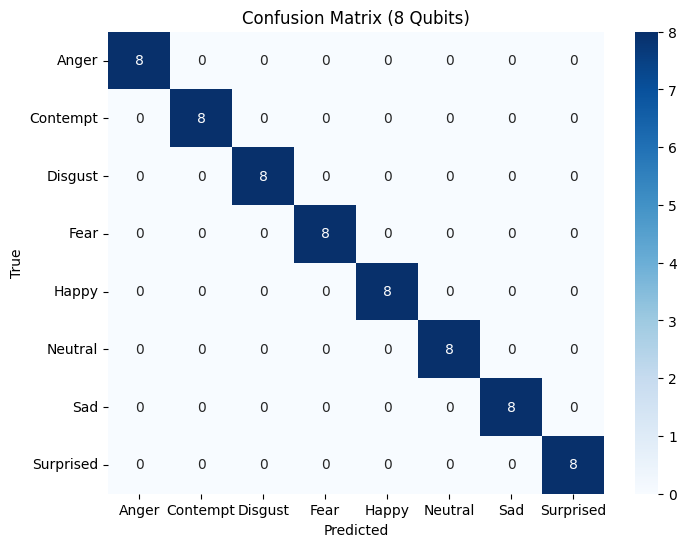

Test Accuracy: 1.0000


Running for 10 qubits...

Quantum circuit diagram:
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 760ms/step - accuracy: 0.2656 - loss: 1.8767 - val_accuracy: 0.9062 - val_loss: 0.7842
Epoch 2/30
2/2 - 0s - 48ms/step - accuracy: 0.8594 - loss: 0.6704 - val_accuracy: 0.9844 - val_loss: 0.2451
Epoch 3/30
2/2 - 0s - 47ms/step - accuracy: 0.9219 - loss: 0.3673 - val_accuracy: 0.9844 - val_loss: 0.0833
Epoch 4/30
2/2 - 0s - 47ms/step - accuracy: 1.0000 - loss: 0.1365 - val_accuracy: 1.0000 - val_loss: 0.0317
Epoch 5/30
2/2 - 0s - 46ms/step - accuracy: 1.0000 - loss: 0.0604 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 6/30
2/2 - 0s - 46ms/step - accuracy: 0.9844 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 7/30
2/2 - 0s - 47ms/step - accuracy: 1.0000 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 8/30
2/2 - 0s - 46ms/step - accuracy: 1.0000 - loss: 0.0238 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 9/30
2/2 - 0s - 46ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 10/30
2/2 - 0s - 46ms/step - acc

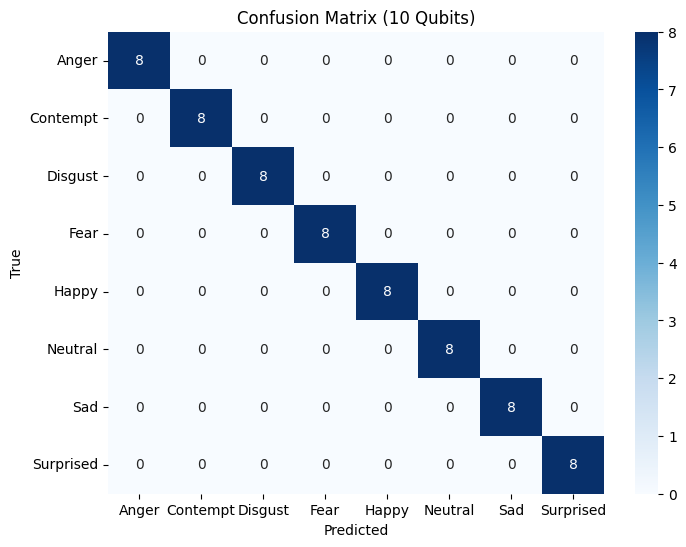

Test Accuracy: 1.0000


Running for 12 qubits...

Quantum circuit diagram:
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 944ms/step - accuracy: 0.1875 - loss: 2.2287 - val_accuracy: 0.8438 - val_loss: 0.7775
Epoch 2/30
2/2 - 0s - 47ms/step - accuracy: 0.8906 - loss: 0.7091 - val_accuracy: 0.9844 - val_loss: 0.2558
Epoch 3/30
2/2 - 0s - 47ms/step - accuracy: 0.9531 - loss: 0.3691 - val_accuracy: 0.9844 - val_loss: 0.1074
Epoch 4/30
2/2 - 0s - 50ms/step - accuracy: 0.9688 - loss: 0.1788 - val_accuracy: 0.9844 - val_loss: 0.0609
Epoch 5/30
2/2 - 0s - 49ms/step - accuracy: 0.9844 - loss: 0.1239 - val_accuracy: 0.9844 - val_loss: 0.0399
Epoch 6/30
2/2 - 0s - 49ms/step - accuracy: 0.9688 - loss: 0.0701 - val_accuracy: 0.9844 - val_loss: 0.0244
Epoch 7/30
2/2 - 0s - 47ms/step - accuracy: 0.9688 - loss: 0.1210 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 8/30
2/2 - 0s - 48ms/step - accuracy: 0.9844 - loss: 0.0710 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 9/30
2/2 - 0s - 48ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 10/30
2/2 - 0s - 48ms/step - acc

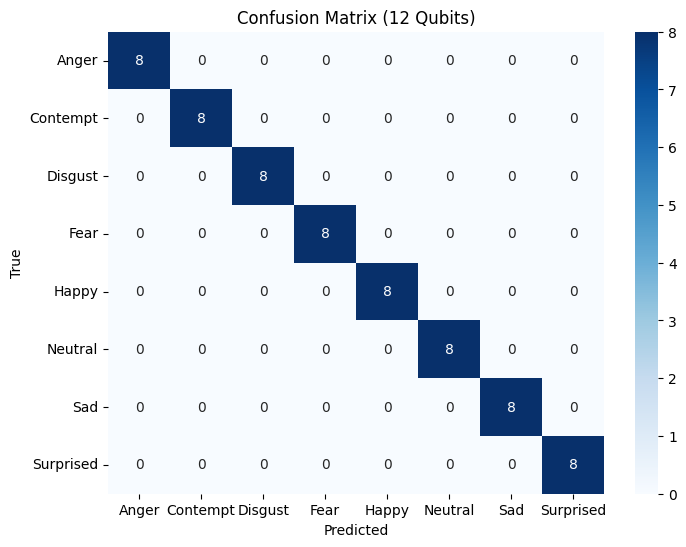

Test Accuracy: 1.0000


=== Summary of Results ===
4 Qubits: Accuracy = 1.0000
6 Qubits: Accuracy = 1.0000
8 Qubits: Accuracy = 1.0000
10 Qubits: Accuracy = 1.0000
12 Qubits: Accuracy = 1.0000


In [4]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define qubit patch sizes
qubit_patch_shapes = {
    4: (2, 2),
    6: (3, 2),
    8: (4, 2),
    10: (5, 2),
    12: (4, 3),
}

n_epochs = 30

# Function to create circuit
def create_circuit(n_qubits, n_layers=3):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding pixels
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit, dev, rand_params

# Quantum convolution
def quanv(image, circuit, patch_h, patch_w):
    out_h = (image.shape[0] - patch_h) // 2 + 1
    out_w = (image.shape[1] - patch_w) // 2 + 1
    n_qubits = patch_h * patch_w
    out = np.zeros((out_h, out_w, n_qubits))

    for j in range(0, image.shape[0] - patch_h + 1, 2):
        for k in range(0, image.shape[1] - patch_w + 1, 2):
            patch_pixels = image[j:j+patch_h, k:k+patch_w, 0].flatten()
            q_results = circuit(patch_pixels)
            for c in range(n_qubits):
                out[j // 2, k // 2, c] = q_results[c]
    return out

# Training & Evaluation
def run_for_qubits(n_qubits):
    print(f"\nRunning for {n_qubits} qubits...")
    patch_h, patch_w = qubit_patch_shapes[n_qubits]
    circuit, dev, rand_params = create_circuit(n_qubits)

    # Show quantum circuit
    print("\nQuantum circuit diagram:")
    qml.draw(circuit)(np.random.rand(n_qubits))

    # Preprocess images
    q_train = np.array([quanv(img, circuit, patch_h, patch_w) for img in train_images])
    q_test = np.array([quanv(img, circuit, patch_h, patch_w) for img in test_images])

    # Build model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=q_train.shape[1:]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(len(EMOTIONS), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(q_train, train_labels, validation_data=(q_test, test_labels),
              epochs=n_epochs, batch_size=32, verbose=2)

    # Predictions
    y_pred = np.argmax(model.predict(q_test), axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred, target_names=EMOTIONS))

    # Confusion matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=EMOTIONS, yticklabels=EMOTIONS)
    plt.title(f"Confusion Matrix ({n_qubits} Qubits)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Test accuracy
    acc = model.evaluate(q_test, test_labels, verbose=0)[1]
    print(f"Test Accuracy: {acc:.4f}\n")

    return acc

# Run for 4,6,8,10,12 qubits
results = {}
for q in [4, 6, 8, 10, 12]:
    acc = run_for_qubits(q)
    results[q] = acc

print("\n=== Summary of Results ===")
for q, a in results.items():
    print(f"{q} Qubits: Accuracy = {a:.4f}")


In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers

# Define qubit counts
qubit_counts = [4, 6, 8, 10, 12]

def create_circuit(n_qubits, n_layers=1):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        # Random layers
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit

# Loop through all qubit counts and print their circuits
for n_qubits in qubit_counts:
    print(f"\n=== Quantum Circuit for {n_qubits} Qubits ===")
    circuit = create_circuit(n_qubits)
    print(qml.draw(circuit)(np.random.rand(n_qubits)))  # <-- This prints the circuit



=== Quantum Circuit for 4 Qubits ===
0: ──RY(2.29)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(0.54)─├RandomLayers(M0)─┤  <Z>
2: ──RY(1.64)─├RandomLayers(M0)─┤  <Z>
3: ──RY(0.17)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[6.12938239 5.37717099 0.07360176 2.26180889]]

=== Quantum Circuit for 6 Qubits ===
0: ──RY(1.87)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(2.46)─├RandomLayers(M0)─┤  <Z>
2: ──RY(1.57)─├RandomLayers(M0)─┤  <Z>
3: ──RY(0.16)─├RandomLayers(M0)─┤  <Z>
4: ──RY(2.20)─├RandomLayers(M0)─┤  <Z>
5: ──RY(3.12)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[1.12777057 1.07434048 2.91194837 5.49510396 5.93207935 3.82176547]]

=== Quantum Circuit for 8 Qubits ===
0: ──RY(2.97)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(2.32)─├RandomLayers(M0)─┤  <Z>
2: ──RY(1.54)─├RandomLayers(M0)─┤  <Z>
3: ──RY(0.71)─├RandomLayers(M0)─┤  <Z>
4: ──RY(0.80)─├RandomLayers(M0)─┤  <Z>
5: ──RY(0.18)─├RandomLayers(M0)─┤  <Z>
6: ──RY(1.36)─├RandomLayers(M0)─┤  <Z>
7: ──RY(0.98)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[3.85766187 3.36548016 3.7065137  4.58749201


=== Quantum Circuit for 4 Qubits ===


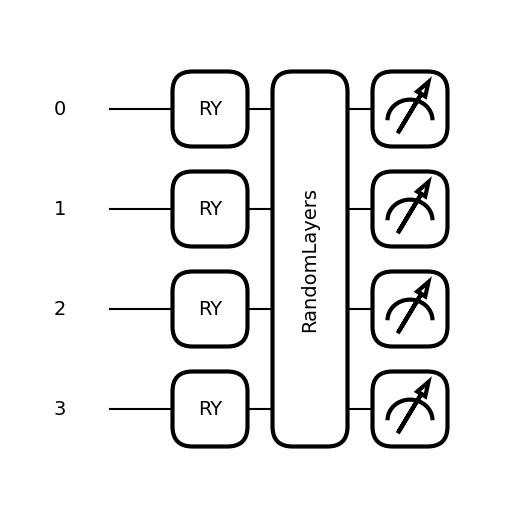


=== Quantum Circuit for 6 Qubits ===


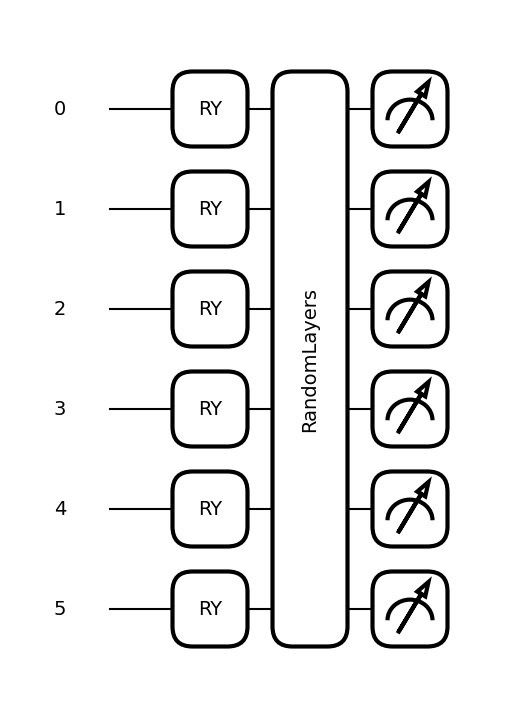


=== Quantum Circuit for 8 Qubits ===


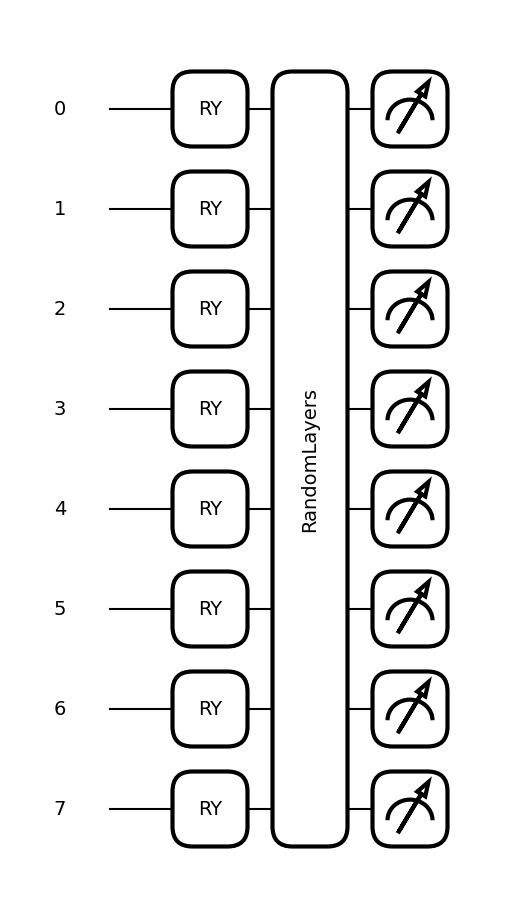


=== Quantum Circuit for 10 Qubits ===


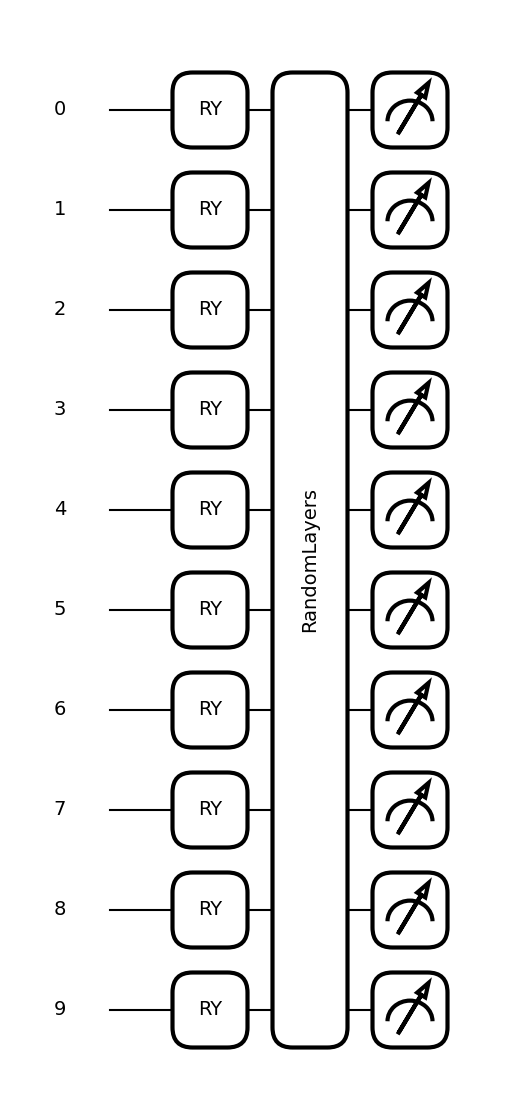


=== Quantum Circuit for 12 Qubits ===


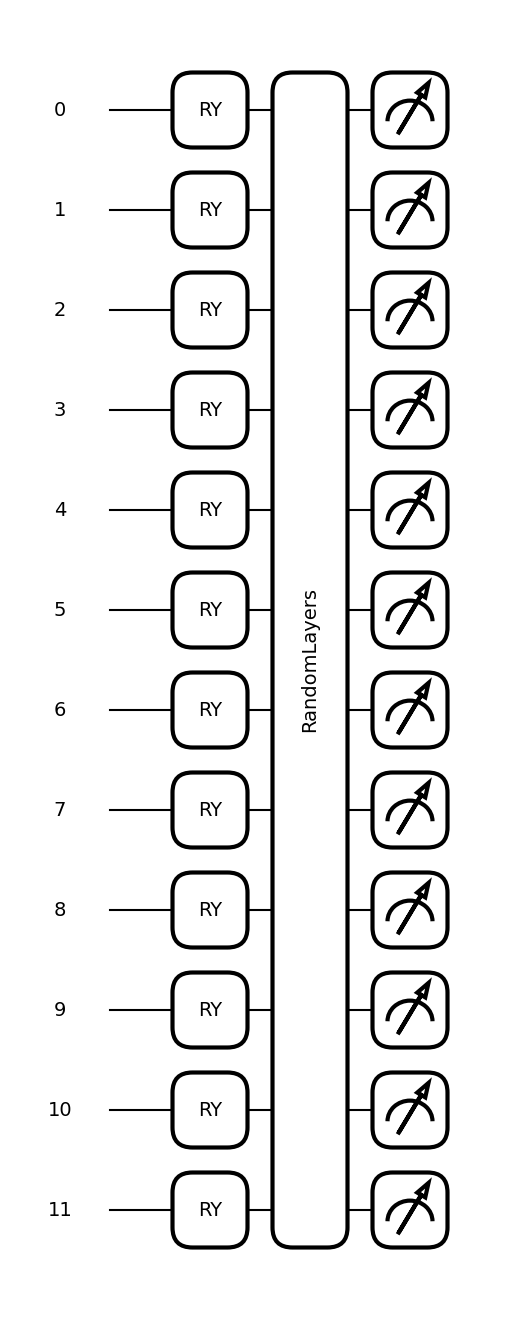

In [6]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import matplotlib.pyplot as plt

# Qubit counts
qubit_counts = [4, 6, 8, 10, 12]

def create_circuit(n_qubits, n_layers=1):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        # Random layers
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit

# Display circuits graphically
for n_qubits in qubit_counts:
    print(f"\n=== Quantum Circuit for {n_qubits} Qubits ===")
    circuit = create_circuit(n_qubits)
    fig, ax = qml.draw_mpl(circuit)(np.random.rand(n_qubits))
    plt.show()